In [ ]:
#| label: Import-Modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml

In [ ]:
#| label: Downlaod-Data
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()
# Extract data and target
x, y = mnist["data"], mnist["target"]

In [ ]:

#| label: See-an-example
some_digit_image = x.iloc[0].values.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
# Compared to Target
y.iloc[0]

In [ ]:
#| label: Split-data-into-train-and-test
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
# For the sake of simplicity, two classes 5 or not 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
#| label: Stochastic-Gradient-Descent-SGD
#| include: false
# https://scikit-learn.org/stable/modules/sgd.html#:~:text=1.-,Classification,equivalent%20to%20a%20linear%20SVM.
from sklearn.linear_model import SGDClassifier
# clf is short for classifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

In [ ]:
#| label: Performance-Measures
# K-Fold cross-validation analysis and assessment
from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = "accuracy")
# https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=the%20accuracy%20paradox.-,Accuracy%20paradox,the%20dataset%20is%20reasonably%20balanced.

In [ ]:
#| label: Accuracy-metrics-is-only-suitable-for-balanced-data
# Solutions: Confusion Matix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)

In [ ]:
#| label: Concise-matrix
#  1. Precision = TP/TP+FP 2. Recall = TP/FN+TP
# Precision: Given Test positive, it is actual positive
# Recall: Given Actual positive, it is test positive
print("Confusion Matrix")
confusion_matrix(y_true = y_train_5, y_pred = y_train_pred)

In [ ]:
#| label: Accuracy-Metrics
# Precision
print("Precision: ", precision_score(y_true = y_train_5, y_pred = y_train_pred))
# Recall
print("Recall: ", recall_score(y_true = y_train_5, y_pred = y_train_pred))
# F1 Score
print("F1 Score: ", f1_score(y_true = y_train_5, y_pred = y_train_pred))
# Increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

In [ ]:
#| label: y_scores
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3, method = "decision_function")

In [ ]:
#| label: Precision-versus-Recall
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
#| label: PR-Curve
#| fig-cap: "Precision Versus Recall"
plt.figure()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
#| label: ROC(Receiver-operating-characteristic)
from sklearn.metrics import roc_curve, roc_auc_score
# Recall versus 1-specificity (True positive rate verus False positive rate)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
#| label: ROC-Curve
#| fig-cap: "ROC"
plt.figure()
plt.plot(fpr,tpr)
# Add Reference Line
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("AUC: ", roc_auc_score(y_train_5, y_scores))

In [ ]:
#| label: RandomForest
#| include: false
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
# cross_val_predict(forest_clf, x_train, y_train_5, cv = 3, method = "predict_proba")

In [ ]:
#| label: Multiclass
# Two strategies. One is OvA(one versus all) and the other(one versus one)
sgd_clf.fit(x_train, y_train)

In [ ]:
#| label: Multiclass-Example
# sgd_clf.predict([x.iloc[0].values])
# sgd_clf.decision_function([x.iloc[0].values])
# np.argmax(sgd_clf.decision_function([x.iloc[0].values]))
# Find the index of max decision score
sgd_clf.classes_[np.argmax(sgd_clf.decision_function([x.iloc[12].values]))]
# Compare the actual class
y.iloc[12]

In [ ]:
#| label: Multiclass-RandomFroest
forest_clf.fit(x_train,y_train)

In [ ]:
#| label: Predict-Class
# Predict Class
forest_clf.predict([x.iloc[0].values])
# Predict Probability
forest_clf.predict_proba([x.iloc[0].values])
# cross_val_predict(forest_clf, x_train, y_train, cv = 3)
# Overall Predict
# forest_clf.predict(x_train).shape
# forest_clf.predict_proba(x_train)

In [63]:
#| label: Error-Analysis
# cross_val_predict: multiple rounds, predict one round
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)

<function matplotlib.pyplot.show(close=None, block=None)>

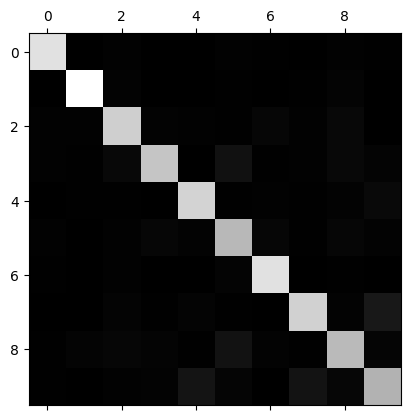

In [68]:
#| label: Confusion-Matrix
confusion_matrix(y_train, y_train_pred)
plt.matshow(confusion_matrix(y_train, y_train_pred), cmap = plt.cm.gray)
plt.show